**Exp 8: Implement Multiclass Classification models for students
Performance Level analysis and perform comparative analysis.
(Random Forest, Decision Tree, Multinomial Logistic Regression,
XGBoost, K-Nearest Neighbors).**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix,classification_report,roc_auc_score


In [3]:
df=pd.read_csv('/content/drive/MyDrive/multiclass_classification_dataset_500_samples.csv')
df.head()

,Study_Hours,Attendance_Percentage,Assignment_Score,Internal_Marks,Participation,Internet_Access,Previous_Grade,Performance_Level
0,22.48,84.26,86.79,76.68,Medium,Yes,B,1
1,19.31,94.09,81.10,56.73,Low,Yes,B,1
2,23.24,61.01,70.72,52.73,Medium,Yes,A,0
3,27.62,80.63,62.24,64.95,Low,Yes,C,0
4,18.83,68.49,78.38,62.45,High,Yes,B,0


In [4]:
print(df.shape)
df.describe()
df.info()

(500, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Study_Hours            500 non-null    float64
 1   Attendance_Percentage  500 non-null    float64
 2   Assignment_Score       500 non-null    float64
 3   Internal_Marks         500 non-null    float64
 4   Participation          500 non-null    object 
 5   Internet_Access        500 non-null    object 
 6   Previous_Grade         500 non-null    object 
 7   Performance_Level      500 non-null    int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 31.4+ KB


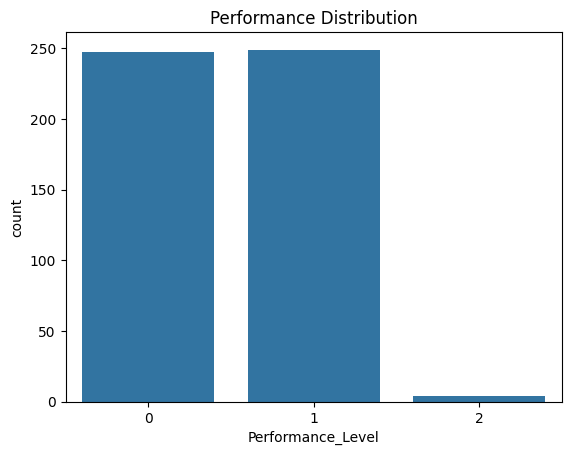

In [5]:
sns.countplot(x="Performance_Level",data=df)
plt.title("Performance Distribution")
plt.show()


In [8]:
df=pd.get_dummies(df,drop_first=True)
df.head()


,Study_Hours,Attendance_Percentage,Assignment_Score,Internal_Marks,Performance_Level,Participation_Low,Participation_Medium,Internet_Access_Yes,Previous_Grade_B,Previous_Grade_C
0,22.48,84.26,86.79,76.68,1,False,True,True,True,False
1,19.31,94.09,81.10,56.73,1,True,False,True,True,False
2,23.24,61.01,70.72,52.73,0,False,True,True,False,False
3,27.62,80.63,62.24,64.95,0,True,False,True,False,True
4,18.83,68.49,78.38,62.45,0,False,False,True,True,False


In [9]:
X=df.drop("Performance_Level",axis=1)
y=df["Performance_Level"]


In [10]:
sc=StandardScaler()
X=sc.fit_transform(X)


In [11]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [12]:
models={
"Random Forest":RandomForestClassifier(),
"Decision Tree":DecisionTreeClassifier(),
"Logistic Regression":LogisticRegression(max_iter=2000),
"KNN":KNeighborsClassifier(),
"XGBoost":XGBClassifier(eval_metric="mlogloss")
}


In [13]:
results=[]

for name,model in models.items():

    model.fit(X_train,y_train)
    pred=model.predict(X_test)

    acc=accuracy_score(y_test,pred)
    pre=precision_score(y_test,pred,average="weighted")
    rec=recall_score(y_test,pred,average="weighted")

    f1w=f1_score(y_test,pred,average="weighted")
    f1m=f1_score(y_test,pred,average="macro")
    f1mi=f1_score(y_test,pred,average="micro")

    results.append([name,acc,pre,rec,f1w,f1m,f1mi])

results_df=pd.DataFrame(results,columns=[
"Model","Accuracy","Precision","Recall",
"F1_weighted","F1_macro","F1_micro"
])

results_df


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/m

,Model,Accuracy,Precision,Recall,F1_weighted,F1_macro,F1_micro
0,Random Forest,0.92,0.914712,0.92,0.915442,0.616334,0.92
1,Decision Tree,0.93,0.923123,0.93,0.925370,0.623038,0.93
2,Logistic Regression,0.98,0.970227,0.98,0.975057,0.656883,0.98
3,KNN,0.73,0.736728,0.73,0.726746,0.489010,0.73
4,XGBoost,0.95,0.952043,0.95,0.950155,0.965983,0.95


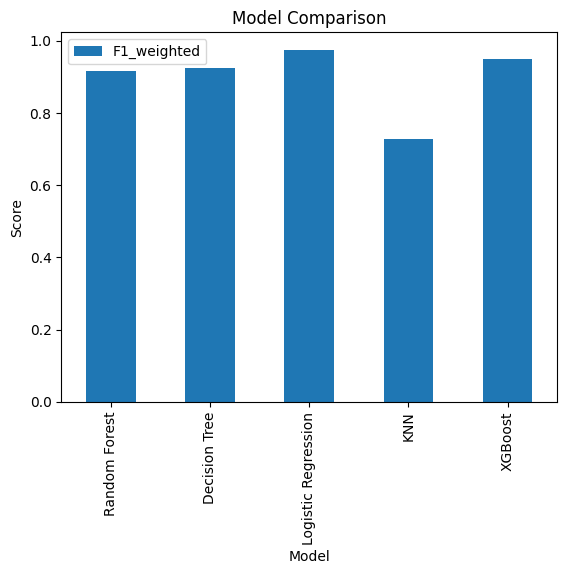

In [14]:
results_df.plot(x="Model",y="F1_weighted",kind="bar")
plt.title("Model Comparison")
plt.ylabel("Score")
plt.show()


In [15]:
best_name=results_df.sort_values("F1_weighted",ascending=False).iloc[0,0]
best_model=models[best_name]

print("Best Model:",best_name)


Best Model: Logistic Regression


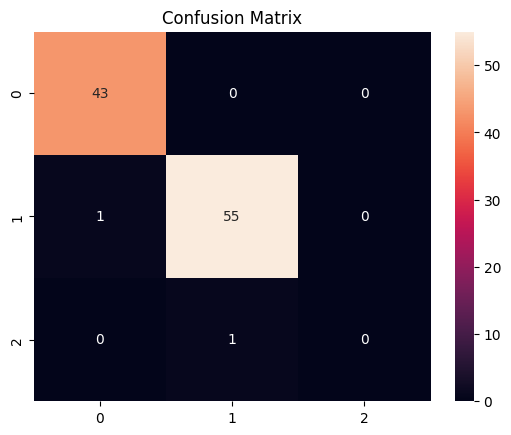

In [16]:
pred=best_model.predict(X_test)
cm=confusion_matrix(y_test,pred)
sns.heatmap(cm,annot=True,fmt='d')
plt.title("Confusion Matrix")
plt.show()


In [17]:
print(classification_report(y_test,pred))


              precision    recall  f1-score   support

           0       0.98      1.00      0.99        43
           1       0.98      0.98      0.98        56
           2       0.00      0.00      0.00         1

    accuracy                           0.98       100
   macro avg       0.65      0.66      0.66       100
weighted avg       0.97      0.98      0.98       100



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
